# Kinematic Model
Here is the representation of the kinematic model of a standard 7-DOF robotic arm, where it's analysed every aspect of it since the Denavit-Hartenberg Convection to a full controlled path-guided model.
This, therefore, helps in the creation of new study materials for the future, where the analysis of this kind could be based of in this little revamp of a project.


In [2]:
from sympy import init_printing
init_printing(
    use_latex=True, 
    use_unicode=True
)

## Formulating the model
The model for this representation is a 7-DOF, where, by the DHC, it's possible to create a table which can represent it.


In [3]:
from dhc import generate_robot
Robot, q = generate_robot()
Robot

⎡0.213   q₁   0    1.5707963267949          0        ⎤
⎢                                                    ⎥
⎢  0     q₂  0.25  1.5707963267949   1.5707963267949 ⎥
⎢                                                    ⎥
⎢  0     q₃  0.26  -1.5707963267949         0        ⎥
⎢                                                    ⎥
⎢  0     q₄   0    -1.5707963267949  -1.5707963267949⎥
⎢                                                    ⎥
⎢0.3385  q₅   0    1.5707963267949   1.5707963267949 ⎥
⎢                                                    ⎥
⎢  0     q₆   0    -1.5707963267949         0        ⎥
⎢                                                    ⎥
⎣0.1385  q₇   0           0                 0        ⎦

In [4]:
from kinematic import dkin
T = dkin(Robot)
T

⎡                                                                             
⎢                                                                             
⎢⎛⎛⎛⎛                                     ⎛     8948650721⎞⎞    ⎛     89486507
⎢⎜⎜⎜⎜sin(q₁)⋅sin(q₃) + cos(q₁)⋅cos(q₃)⋅cos⎜q₂ + ──────────⎟⎟⋅cos⎜q₄ - ────────
⎢⎝⎝⎝⎝                                     ⎝     5696887985⎠⎠    ⎝     56968879
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢ ⎛⎛⎛⎛                   ⎛     8948650721⎞                  ⎞    ⎛     8948650
⎢ ⎜⎜⎜⎜sin(q₁)⋅cos(q₃)⋅cos⎜q₂ + ──────────⎟ - sin(q₃)⋅cos(q₁)⎟⋅cos⎜q₄ - ───────
⎢ ⎝⎝⎝⎝                   ⎝     5696887985⎠                  ⎠    ⎝     5696887
⎢                                                                             
⎢                                                   

In [5]:
from kinematic import geometric_jacobian
J = geometric_jacobian(Robot, q)
J

⎡     ⎛⎛⎛                   ⎛     8948650721⎞                  ⎞    ⎛     8948
⎢ 277⋅⎜⎜⎜sin(q₁)⋅cos(q₃)⋅cos⎜q₂ + ──────────⎟ - sin(q₃)⋅cos(q₁)⎟⋅cos⎜q₄ - ────
⎢     ⎝⎝⎝                   ⎝     5696887985⎠                  ⎠    ⎝     5696
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢      ⎛⎛⎛                                     ⎛     8948650721⎞⎞    ⎛     894
⎢  277⋅⎜⎜⎜sin(q₁)⋅sin(q₃) + cos(q₁)⋅cos(q₃)⋅cos⎜q₂ + ──────────⎟⎟⋅cos⎜q₄ - ───
⎢      ⎝⎝⎝                                     ⎝     5696887985⎠⎠    ⎝     569
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                   

Simulate a model where, given a vector $\boldsymbol{q}(t)=(q_1(t),q_2(t),q_3(t),q_4(t),q_5(t),q_6(t),q_7(t))$, it will test how the end-effector position and orientation changes along side time. For this, firstly, it's important to describe how the robot will move.

For a simple test like this, the arm will revolve 7 times around its first axis

$$q_1(t)=\frac{7\pi}{10}t$$

While the 2nd and 6th axis will colaborate with each other to make a spherical spiral:

$$q_2(t)=-\frac{\pi}{40}t$$

$$q_{6}=-\frac{\pi}{2}+\frac{\pi}{40}t-\frac{\pi\left(e^{-6t}-e^{-60}\right)}{2e^{-60}-2}$$

In [6]:
import numpy as np

t  = np.linspace(0.0, 20.0, num=2000)
q1 = (7*np.pi/10)*t
q2 = -(np.pi/40)*t
q6 = -np.pi/2 - q2 - (np.pi*(np.exp(-6*t)-np.exp(-60)))/(2*np.exp(-60)-2)

In [7]:
from matplotlib import pyplot as plot
%matplotlib inline

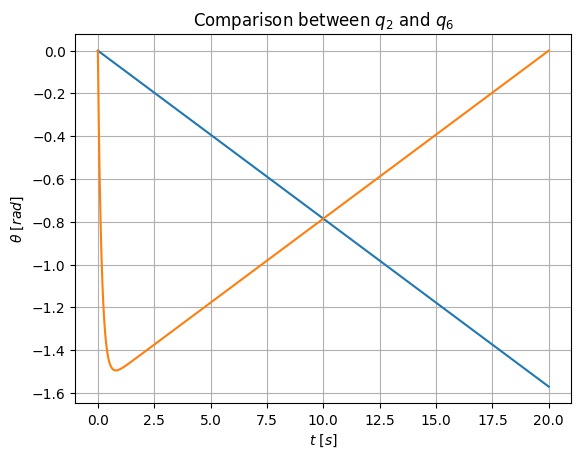

In [8]:
plot.figure()
plot.plot(t,q2,t,q6)
plot.xlabel("$t\ [s]$")
plot.ylabel(r"$\theta\ [rad]$")
plot.title("Comparison between $q_2$ and $q_6$")
plot.grid(True)
plot.show()

In [9]:
## Transforming T and J from sympy matrices to numpy functions
from sympy import lambdify
T = lambdify(q,T,modules='numpy')
J = lambdify(q,J,modules='numpy')

In [39]:
q_sim = np.array([
    q1,                 #q1
    q2,                 #q2
    np.zeros_like(q1),  #q3
    np.zeros_like(q1),  #q4
    np.zeros_like(q1),  #q5
    q6,                 #q6
    np.zeros_like(q1),  #q7
])
q_sim

array([[ 0.00000000e+00,  2.20021496e-02,  4.40042993e-02, ...,
         4.39382929e+01,  4.39602950e+01,  4.39822972e+01],
       [-0.00000000e+00, -7.85791059e-04, -1.57158212e-03, ...,
        -1.56922474e+00, -1.57001054e+00, -1.57079633e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -9.07346668e-02, -1.76137010e-01, ...,
        -1.57158212e-03, -7.85791059e-04, -1.37546949e-26],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## First simulation
Output the resulting end-effector, checking if the trajectory is a spherical spiral 

In [35]:
pe = np.zeros((3,len(t)))
pe[:,0].shape

In [36]:
T(*q_sim[0,:])[:3,-1].shape

In [40]:
for instant, _ in enumerate(t): 
    Ti = T(*q_sim[:,instant])
    pe[:,instant] = Ti[:3,-1]

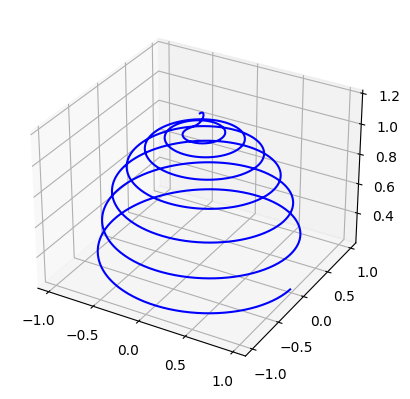

In [41]:
from mpl_toolkits import mplot3d
fig = plot.figure()
ax = plot.axes(projection='3d')
ax.plot3D(*pe, 'blue')
fig.show()

## Jacobian Validation
Now, validating the Jacobian, $\boldsymbol{J}$, of the system, it's necessary to achieve the velocities in the motors, $\dot{\boldsymbol{q}}$, and the velocities of the end-effector, $\dot{\boldsymbol{p}}_e$, to garantee the equality given by the Jacobian:

$$\dot{\boldsymbol{p}}_e=\boldsymbol{J}\dot{\boldsymbol{q}}$$

Which, in return, can be written as 

$$\begin{bmatrix}v_x\\ v_y\\ v_z\\ \omega_x\\ \omega_y\\ \omega_z\end{bmatrix}=\boldsymbol{J}\begin{bmatrix}\dot{q}_1\\ \dot{q}_2\\ \dot{q}_3\\ \dot{q}_4\\ \dot{q}_5\\ \dot{q}_6\\ \dot{q}_7\end{bmatrix}$$

Where $v$ and $\omega$ are the linear and angular velocities, respectfully, of the end-effector.

To achieve this, in the right side it's possible to use the formal definition of derivative in the $\boldsymbol{q}$ vector in the following manner:

$$\lim_{\Delta t \to 0}\frac{\boldsymbol{q}(t_i) - \boldsymbol{q}(t_i-\Delta t)}{\Delta t}=\dot{\boldsymbol{q}}(t_i)$$

Since $\Delta t$ is already define in this notebook as 

In [18]:
dt = t[-1] / len(t)
dt

In [43]:
dq = np.zeros_like(q_sim)
previous_q = np.zeros_like(q)
for instant, _ in enumerate(t):
    dq[:, instant] = (q_sim[:, instant] - previous_q) / dt
    previous_q = q_sim[:, instant]

dq

array([[ 0.        ,  2.20021496,  2.20021496, ...,  2.20021496,
         2.20021496,  2.20021496],
       [-0.        , -0.07857911, -0.07857911, ..., -0.07857911,
        -0.07857911, -0.07857911],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -9.07346668, -8.54023433, ...,  0.07857911,
         0.07857911,  0.07857911],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

For the end-effector velocity, the same process can be applied to the linear velocity, but it can't for the angular velocity due the orientation of the end-effector is described by the rotation matrix $R$ from the direct kinematic matrix $T$. 

In [44]:
dpe = np.zeros_like(pe)
previous_pe = np.zeros_like(pe[:, 0])
for instant, _ in enumerate(t):
    dpe[:, instant] = (pe[:, instant] - previous_pe) / dt
    previous_pe = pe[:, instant]

dpe

array([[-1.78065548e-13,  4.98846362e-02, -2.01585973e-03, ...,
         1.18364887e-01,  7.10417947e-02,  2.36844092e-02],
       [ 0.00000000e+00,  1.25635309e+00,  1.17500952e+00, ...,
         2.15743639e+00,  2.15951571e+00,  2.16055563e+00],
       [ 1.20000000e+02, -5.70033511e-02, -1.57406307e-01, ...,
        -7.75573620e-02, -7.75574981e-02, -7.75575662e-02]])

So, it achieve the angular velocity, one can define the following:

$$\boldsymbol{S}(\omega)=\dot{\boldsymbol{R}}\boldsymbol{R}^T$$

Where $\boldsymbol{S}$ is a skew-symmetric matrix, which in this case it's a matrix compose by the angular velocity vector of the end-effector:

$$S(\omega)=\begin{bmatrix}0 & -\omega_z & \omega_y \\ \omega_z & 0 & -\omega_x \\ -\omega_y & \omega_x & 0\end{bmatrix}$$

There for, one can retrieve the angular velocity vector by selecting the elements of this matrix after the matrix product between the temporal change of the rotation matrix by its transpose

In [46]:
def get_angular_velocity(previous_R: np.array, R: np.array, dt: float) -> np.array:
    dR = (R-previous_R)/dt
    S = dR @ R.T
    return np.array([S[-1,1], S[0,-1], S[1,0]]).T

R = np.eye(3)
we = np.zeros_like(pe)

for instant, _ in enumerate(t):
    we[:, instant] = get_angular_velocity(
        R,
        R := T(*q_sim[:, instant])[:3,:3],
        dt
    )

we

array([[ 0.00000000e+00, -9.06055038e+00, -8.52502835e+00, ...,
         3.64175987e-03,  1.85223208e-03,  6.17467461e-05],
       [ 0.00000000e+00,  7.85790978e-02, -1.08813414e-01, ...,
         7.83998842e-02,  7.85003386e-02,  7.85600787e-02],
       [ 1.00000000e+02,  2.19810580e+00,  2.19740518e+00, ...,
         2.12147476e+00,  2.12147536e+00,  2.12147601e+00]])

With $\dot{\boldsymbol{\omega}}_e$, $\dot{\boldsymbol{p}}$ and $\dot{\boldsymbol{q}}$, it's possible to validate the Jacobian matrix

In [55]:
# combine velocity vector from the dpe and we
ve = np.concatenate((dpe, we), axis=0)
ve.shape

In [57]:
# the velocity vector from the matrix product
# between J and dq
dpe_J = np.zeros_like(ve)

for instant, _ in enumerate(t):
    dpe_J[:, instant] = J(*q_sim[:, instant]) @ dq[:, instant]

dpe_J.shape

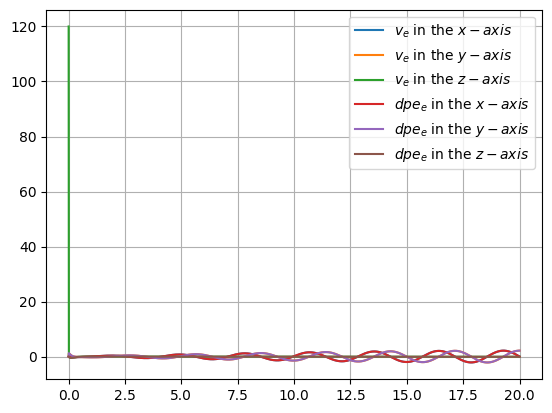

In [65]:
fig = plot.figure()
ax = plot.axes()
ax.plot(t, ve[0,:], label="$v_e$ in the $x-axis$")
ax.plot(t, ve[1,:], label="$v_e$ in the $y-axis$")
ax.plot(t, ve[2,:], label="$v_e$ in the $z-axis$")
ax.plot(t, dpe_J[0,:], label="$dpe_e$ in the $x-axis$")
ax.plot(t, dpe_J[1,:], label="$dpe_e$ in the $y-axis$")
ax.plot(t, dpe_J[2,:], label="$dpe_e$ in the $z-axis$")
ax.grid(); ax.legend()
plot.show()

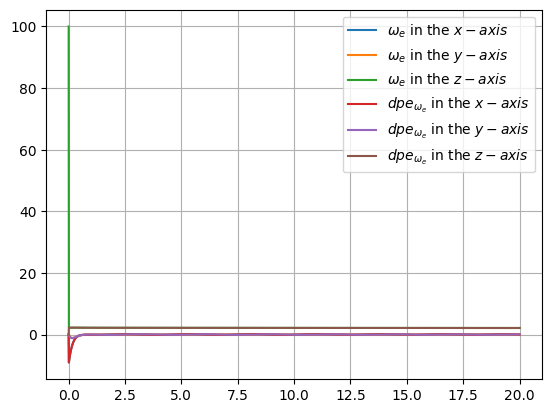

In [70]:
fig = plot.figure()
ax = plot.axes()
ax.plot(t, ve[3,:], label="$\omega_e$ in the $x-axis$")
ax.plot(t, ve[4,:], label="$\omega_e$ in the $y-axis$")
ax.plot(t, ve[5,:], label="$\omega_e$ in the $z-axis$")
ax.plot(t, dpe_J[3,:], label="$dpe_{\omega_e}$ in the $x-axis$")
ax.plot(t, dpe_J[4,:], label="$dpe_{\omega_e}$ in the $y-axis$")
ax.plot(t, dpe_J[5,:], label="$dpe_{\omega_e}$ in the $z-axis$")
ax.grid(); ax.legend()
plot.show()